In [35]:
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd
from scipy import stats

data = pd.read_csv("data/preprocessed_stories.csv", header=None, names=['story'])

sia = SentimentIntensityAnalyzer()

data['negativity'] = data['story'].apply(lambda story: sia.polarity_scores(story).get('neg'))
data['neutrality'] = data['story'].apply(lambda story: sia.polarity_scores(story).get('neu'))
data['positivity'] = data['story'].apply(lambda story: sia.polarity_scores(story).get('pos'))
data['compound'] = data['story'].apply(lambda story: sia.polarity_scores(story).get('compound'))

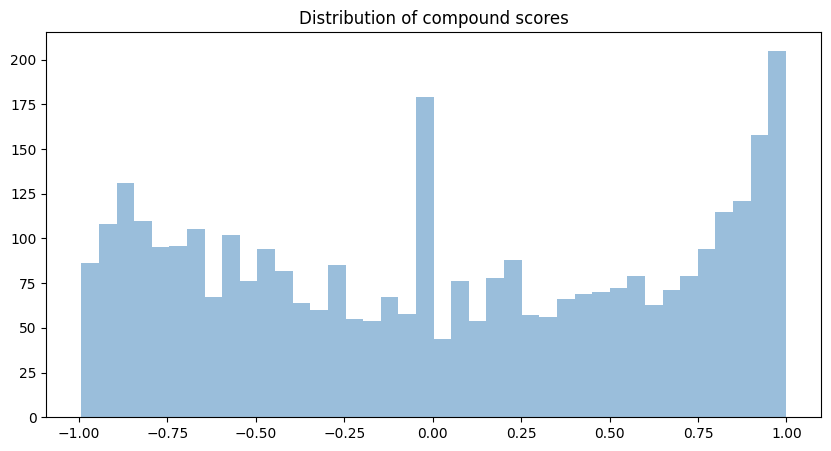

In [40]:
colors = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

plt.figure(figsize=(10, 5))
plt.hist(data['compound'], bins=40, color=colors[0], alpha=0.5, label='negativity')
plt.title('Distribution of compound scores')
plt.show()

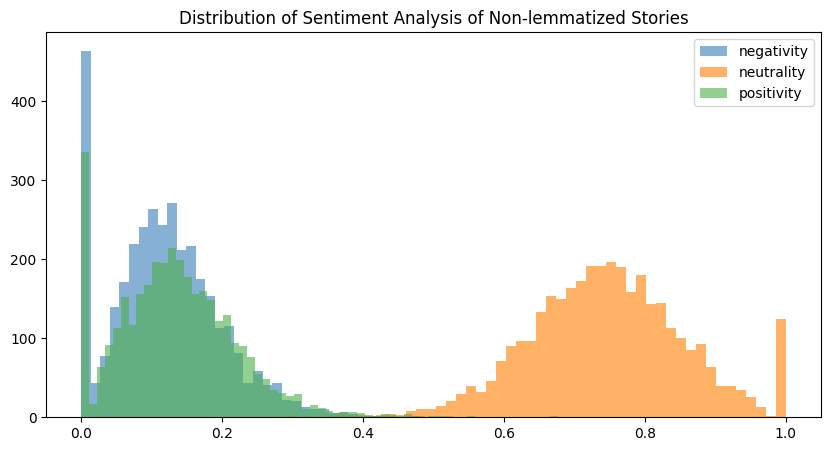

In [3]:
# colorblind friendly colors
colors = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

# plot histograms
plt.figure(figsize=(10, 5))
plt.hist(data['negativity'], bins=50, alpha=0.6, label='negativity', color=colors[0])
plt.hist(data['neutrality'], bins=50, alpha=0.6, label='neutrality',
         color=colors[1])
plt.hist(data['positivity'], bins=50, alpha=0.6, label='positivity',
         color=colors[2])
plt.legend(loc='upper right')
plt.title('Distribution of Sentiment Analysis of Non-lemmatized Stories')
plt.show()

In [4]:
data_lemmatized = pd.read_csv("data/preprocessed_stories_lemmatized.csv", header=None, names=['story'])

data_lemmatized['negativity'] = data_lemmatized['story'].apply(lambda story: sia.polarity_scores(story).get('neg'))
data_lemmatized['neutrality'] = data_lemmatized['story'].apply(lambda story: sia.polarity_scores(story).get('neu'))
data_lemmatized['positivity'] = data_lemmatized['story'].apply(lambda story: sia.polarity_scores(story).get('pos'))

data_lemmatized

,story,negativity,neutrality,positivity
0,accepted friend request facebook common friend...,0.130,0.664,0.206
1,whatsapp message good morning baron ya receive...,0.067,0.667,0.267
2,met alan bumble claimed project manager synerg...,0.141,0.689,0.170
3,connected person named ano cab app june normal...,0.061,0.756,0.183
4,person online name june lee initially contacte...,0.081,0.740,0.179
...,...,...,...,...
3484,deceived look like got hypnosis send fake rece...,0.303,0.585,0.112
3485,linked lady called xue er made appointment mee...,0.131,0.700,0.169
3486,online platform real trading platform know des...,0.115,0.612,0.274
3487,long story short ive known guy name richard cl...,0.168,0.603,0.230


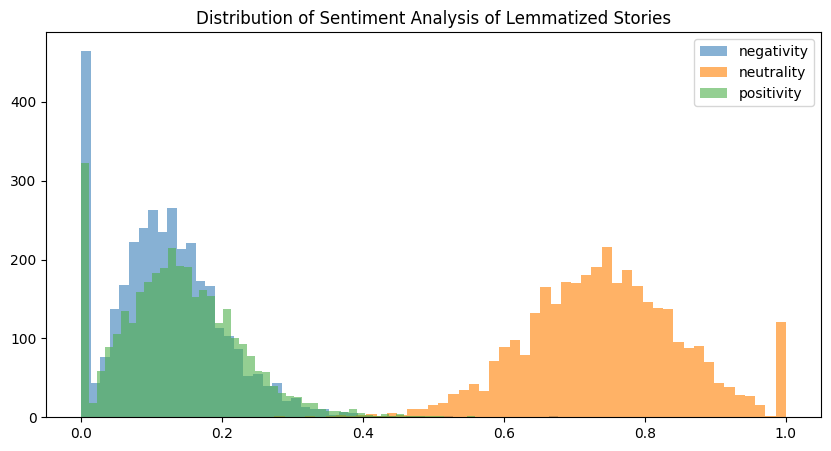

In [5]:
# plot histograms
plt.figure(figsize=(10, 5))
plt.hist(data_lemmatized['negativity'], bins=50, alpha=0.6, label='negativity', color=colors[0])
plt.hist(data_lemmatized['neutrality'], bins=50, alpha=0.6, label='neutrality',
            color=colors[1])
plt.hist(data_lemmatized['positivity'], bins=50, alpha=0.6, label='positivity',
            color=colors[2])
plt.legend(loc='upper right')
plt.title('Distribution of Sentiment Analysis of Lemmatized Stories')
plt.show()

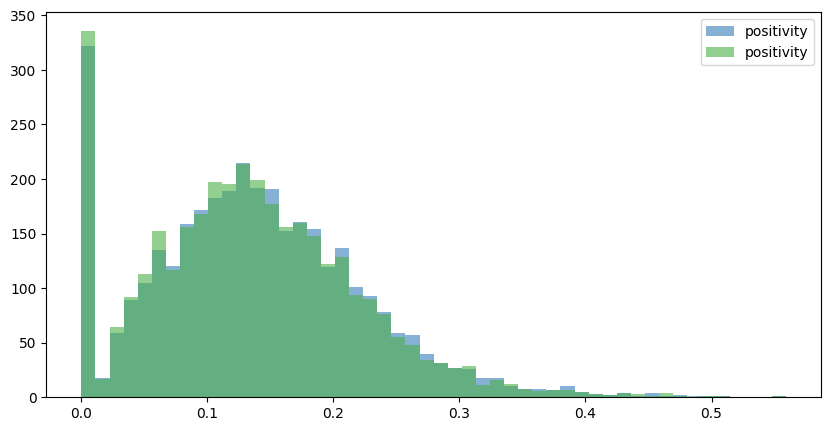

In [6]:
plt.figure(figsize=(10, 5))
plt.hist(data_lemmatized['positivity'], bins=50, alpha=0.6, label='positivity', color=colors[0])
plt.hist(data['positivity'], bins=50, alpha=0.6, label='positivity', color=colors[2])
plt.legend(loc='upper right')
plt.show()

In [9]:
df = pd.read_csv("data/preprocessed_stories_without_lemmatization_or_autocorrect.csv")

df['negativity'] = df['story'].apply(lambda story: sia.polarity_scores(story).get('neg'))
df['neutrality'] = df['story'].apply(lambda story: sia.polarity_scores(story).get('neu'))
df['positivity'] = df['story'].apply(lambda story: sia.polarity_scores(story).get('pos'))

df

,story,spell_errors,processed_story,negativity,neutrality,positivity
0,I accepted a friend request on Facebook becaus...,43,accepted friend request facebook common friend...,0.078,0.808,0.114
1,"Whatsapp message: Good morning,Aaron here ya😊 ...",22,whatsapp message good morning aaron ya receive...,0.034,0.811,0.155
2,"I met Alan on Bumble, where he claimed to be a...",30,met alan bumble claimed project manager synerg...,0.066,0.841,0.092
3,I connected with a person named Arno on the CM...,61,connected person named arno cmb app june norma...,0.029,0.895,0.076
4,"A person with the online name ""June lee"" initi...",29,person online name june lee initially contacte...,0.061,0.840,0.099
...,...,...,...,...,...,...
3490,I'm being deceived. Look like a got hypnosis. ...,7,deceived look like got hypnosis send fake rece...,0.204,0.718,0.078
3491,Linked up with a lady called Xue Er in Wechat....,28,linked lady called xue er wechat made appointm...,0.065,0.833,0.102
3492,The online platform was not a real trading pla...,25,online platform real trading platform know des...,0.062,0.767,0.171
3493,Long story short..ive known this guy name rich...,19,long story short ive known guy name richard cl...,0.136,0.786,0.078


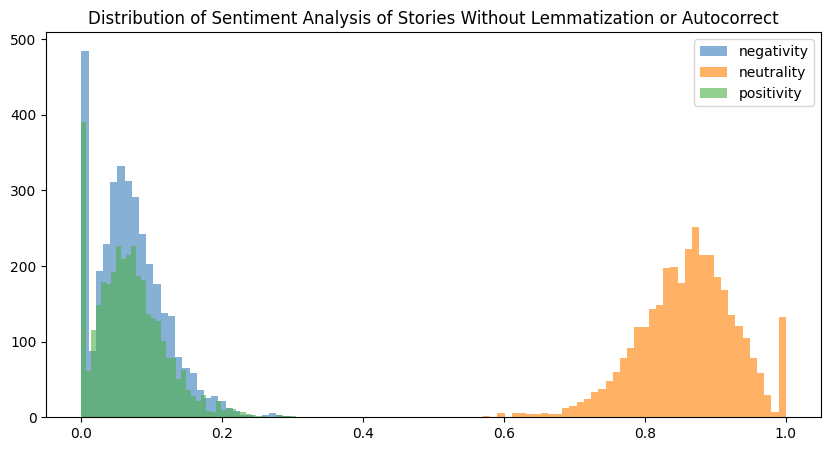

In [ ]:
# plot histograms
plt.figure(figsize=(10, 5))
plt.hist(df['negativity'], bins=50, alpha=0.6, label='negativity', color=colors[0])
plt.hist(df['neutrality'], bins=50, alpha=0.6, label='neutrality',
            color=colors[1])
plt.hist(df['positivity'], bins=50, alpha=0.6, label='positivity',
            color=colors[2])
plt.legend(loc='upper right')
plt.title('Distribution of Sentiment Analysis of Stories Without Lemmatization or Autocorrect')
plt.show()


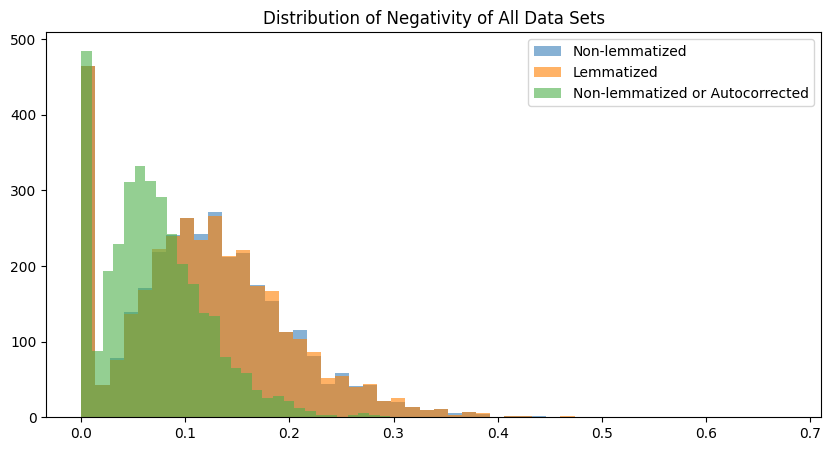

In [18]:
# Plot negativity of all data sets
plt.figure(figsize=(10, 5))
plt.hist(data['negativity'], bins=50, alpha=0.6, label='Non-lemmatized', color=colors[0])
plt.hist(data_lemmatized['negativity'], bins=50, alpha=0.6, label='Lemmatized', color=colors[1])
plt.hist(df['negativity'], bins=50, alpha=0.6, label='Non-lemmatized or Autocorrected', color=colors[2])
plt.legend(loc='upper right')
plt.title('Distribution of Negativity of All Data Sets')
plt.show()

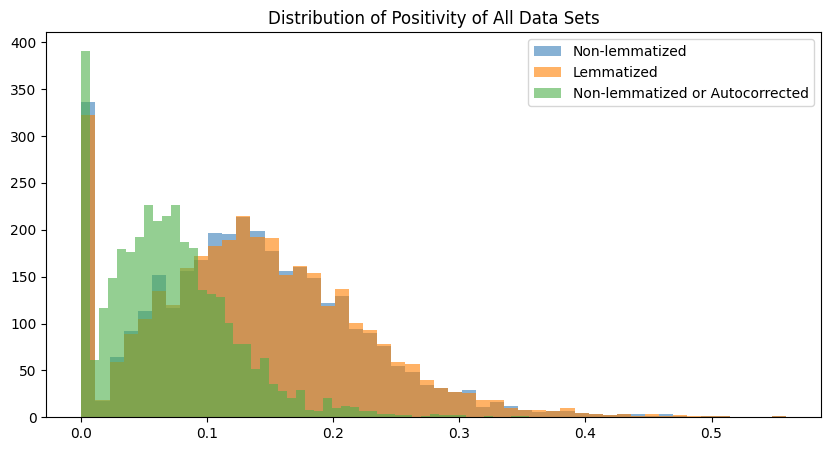

In [ ]:
# Plot positivity of all data sets
plt.figure(figsize=(10, 5))
plt.hist(data['positivity'], bins=50, alpha=0.6, label='Non-lemmatized', color=colors[0])
plt.hist(data_lemmatized['positivity'], bins=50, alpha=0.6, label='Lemmatized', color=colors[1])
plt.hist(df['positivity'], bins=50, alpha=0.6, label='Non-lemmatized or Autocorrected', color=colors[2])
plt.legend(loc='upper right')
plt.title('Distribution of Positivity of All Data Sets')
plt.show()


NameError: name 'df' is not defined

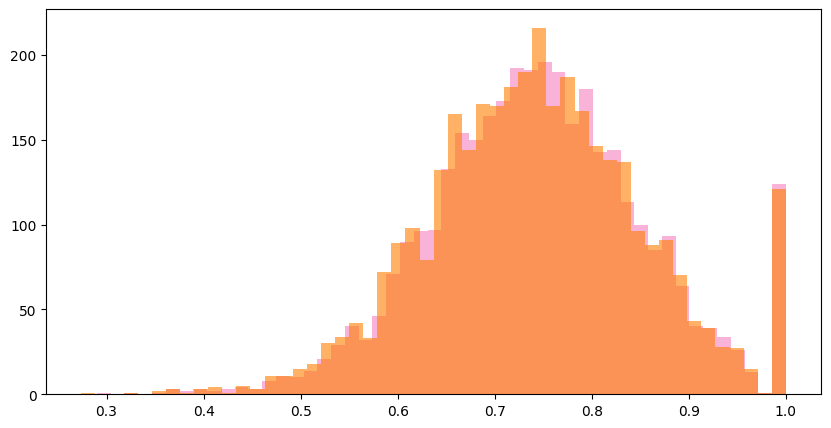

In [8]:
# Plot neutrality of all data sets
plt.figure(figsize=(10, 5))
plt.hist(data['neutrality'], bins=50, alpha=0.6, label='Non-lemmatized', color=colors[3])
plt.hist(data_lemmatized['neutrality'], bins=50, alpha=0.6, label='Lemmatized', color=colors[1])
plt.hist(df['neutrality'], bins=50, alpha=0.6, label='Non-lemmatized or Autocorrected', color=colors[2])
plt.legend(loc='upper left')
plt.title('Distribution of Neutrality of All Data Sets')
plt.show()

In [ ]:
import numpy as np
from gensim.corpora import Dictionary

# tokenize the stories
tokens = list(data['story'].apply(lambda story: np.array(story.split())))
dictionary = Dictionary(tokens)

words = [dictionary[i] for i in range(len(dictionary))]
word_sentiments = [sia.polarity_scores(word).get('neu') for word in words]